In [31]:
# Importing all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # Import the Calculations that will be used in linear_model
from sklearn import metrics # For the Measuring the accuracy of the regression
from sklearn.model_selection import train_test_split # Importing the Linear Model in case if error arises
import datetime as dt
import pandas_ta

In [15]:
# Reading the Dataset
df = pd.read_csv("dataset 2010 to 2021.csv")

In [16]:
df.head()

,Date,Open,High,Low,Close
0,2010-01-04,7.622500,7.660714,7.585000,7.643214
1,2010-01-05,7.664286,7.699643,7.616071,7.656429
2,2010-01-06,7.656429,7.686786,7.526786,7.534643
3,2010-01-07,7.562500,7.571429,7.466071,7.520714
4,2010-01-08,7.510714,7.571429,7.466429,7.570714


In [17]:
filtered_data = df[['Date','Close']]
filtered_data.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


### We are making the date column seperate from the dataset so as to make our regression model work properly

In [18]:
filtered_data.set_index(pd.DatetimeIndex(filtered_data['Date']), inplace=True) # Replacing the Index With dates

In [19]:
filtered_data = filtered_data[['Close']] # Removing the Date from the dataset as it has been set in the index

In [20]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2895 entries, 2010-01-04 to 2021-07-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2895 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


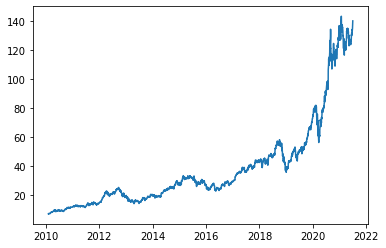

In [27]:
plt.plot(filtered_data.Close) # Plot of data in the initial State 

In [22]:
filtered_data.ta.ema(close='Close', length=10, append=True) # Adding a techincal Indicator used EMA - 10 used in prediciton of 
# Stock Data

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2021-06-28    132.289681
2021-06-29    133.024285
2021-06-30    133.739871
2021-07-01    134.381713
2021-07-02    135.395949
Name: EMA_10, Length: 2895, dtype: float64

In [23]:
filtered_data

,Close,EMA_10
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,NaN
2010-01-06,7.534643,NaN
2010-01-07,7.520714,NaN
2010-01-08,7.570714,NaN
...,...,...
2021-06-28,134.779999,132.289681
2021-06-29,136.330002,133.024285
2021-06-30,136.960007,133.739871


In [25]:
filtered_data = filtered_data.iloc[10:]
filtered_data

,Close,EMA_10
Date,,
2010-02-02,6.995000,7.168113
2010-02-03,7.115357,7.158521
2010-02-04,6.858929,7.104050
2010-02-05,6.980714,7.081625
2010-02-08,6.932857,7.054577
...,...,...
2021-06-28,134.779999,132.289681
2021-06-29,136.330002,133.024285
2021-06-30,136.960007,133.739871


<AxesSubplot:xlabel='Date'>

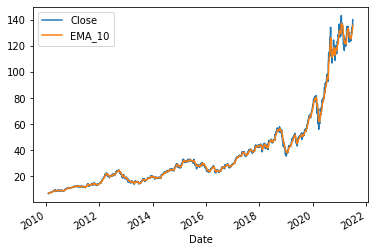

In [29]:
filtered_data.plot(use_index = True) # Plot of data in the final state to see how ema 10 is being traced along the actual data

## Training the Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(filtered_data[['Close']], filtered_data[['EMA_10']], test_size=.2,random_state = 1)

In [33]:
reg = LinearRegression()
reg.fit(X_train, y_train)
yp = reg.predict(X_test)

In [34]:
yp

array([[ 54.58294643],
       [ 29.01262065],
       [ 27.27572053],
       [ 18.29071108],
       [ 17.87161739],
       [ 36.45328841],
       [ 23.14708998],
       [ 49.17402944],
       [127.70119474],
       [ 34.50825673],
       [ 31.76539517],
       [ 12.00679634],
       [ 38.85669992],
       [  9.25402182],
       [ 26.90653754],
       [ 46.26267925],
       [ 11.63938146],
       [ 47.58331725],
       [ 79.24394481],
       [ 35.37794814],
       [ 27.03290352],
       [ 67.22192188],
       [ 51.94910664],
       [ 46.72106304],
       [ 26.8545049 ],
       [ 30.93287291],
       [ 44.02527566],
       [ 43.63131522],
       [ 25.36785799],
       [ 92.77738615],
       [ 64.60295153],
       [ 28.96554251],
       [ 20.3829882 ],
       [ 44.97177617],
       [ 46.44851012],
       [ 15.77084457],
       [ 21.54717643],
       [ 46.60460903],
       [ 20.28918871],
       [ 45.71757638],
       [  8.64024874],
       [ 11.4124914 ],
       [ 28.70042381],
       [116

In [35]:
metrics.r2_score(y_test,yp) # Accuracy of the Model

0.9985577133451751